In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("train_titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
df.shape

(891, 12)

In [6]:
# print the missing values of the columns
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

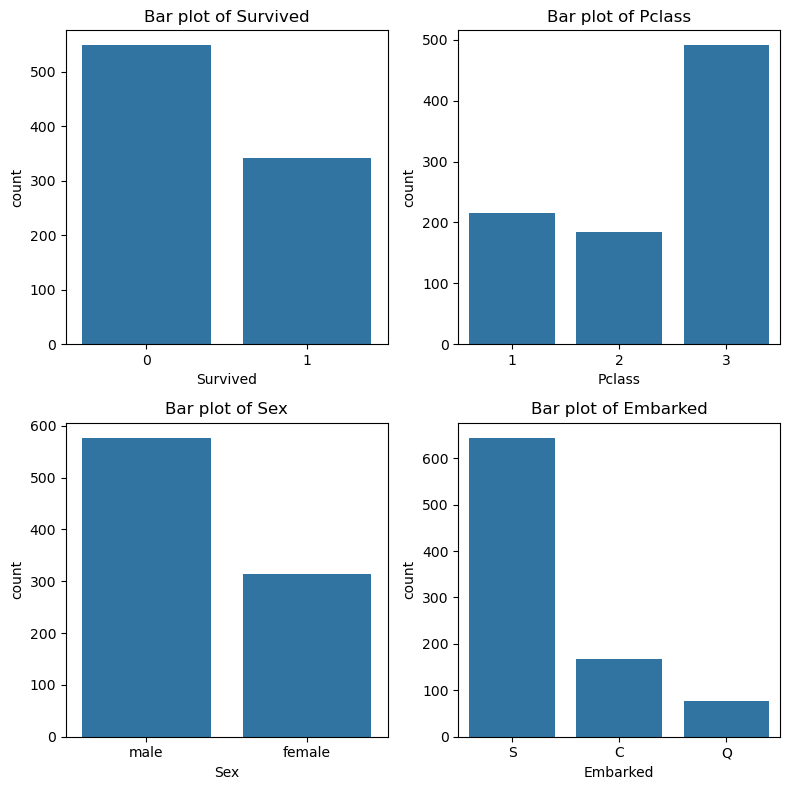

In [9]:
#Barchart of Survived, Pclass, Sex, Embarked

cols = ["Survived", "Pclass", "Sex", "Embarked"]

fig, axes = plt.subplots(2, 2, figsize=(8,8))
axes = axes.flatten()

for i,col in enumerate(cols):
    cur_ax = axes[i]
    sns.countplot(data=df,x=col, ax=cur_ax)
    cur_ax.set_title(f"Bar plot of {col}")

plt.tight_layout()
plt.show()

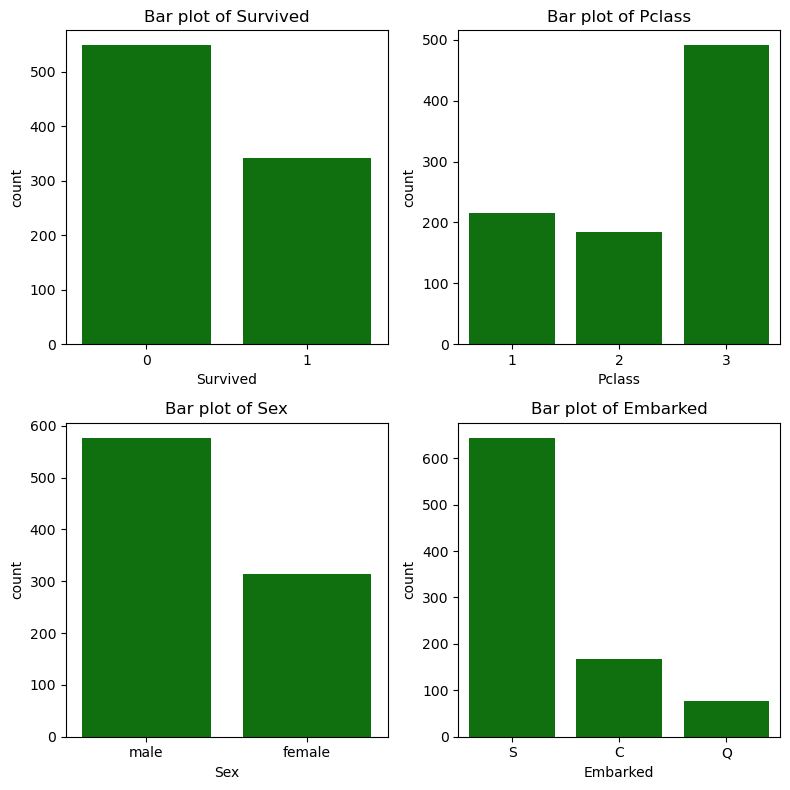

In [4]:
# using same bar plot instead of count plot

fig, axes = plt.subplots(2,2,figsize=(8,8))
axes = axes.flatten()

for i,col in enumerate(cols):
    cur_ax = axes[i]
    new_count_df = df[col].value_counts().reset_index()
    sns.barplot(data=new_count_df,x=col,y="count",color="green",ax = cur_ax)
    cur_ax.set_title(f"Bar plot of {col}")

plt.tight_layout()
plt.show()

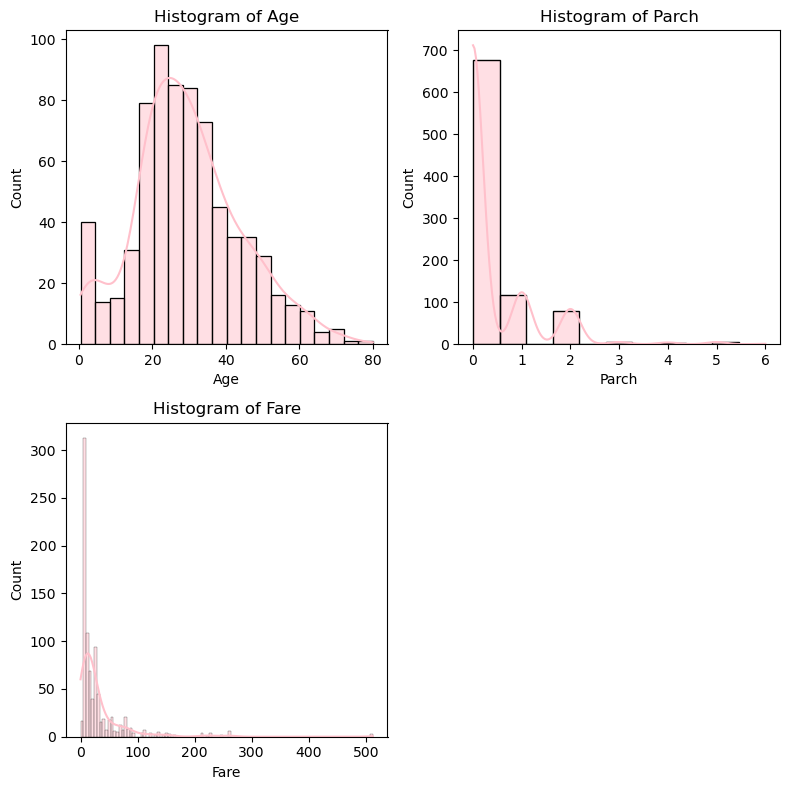

In [19]:
#Histogram of Age, Parch, Fare
cols = ["Age", "Parch", "Fare"]

fig, axes = plt.subplots(2,2,figsize=(8,8))
axes = axes.flatten()

for i, col in enumerate(cols):
    cur_ax = axes[i]
    sns.histplot(data=df,x=col,kde=True,color="pink",ax = cur_ax)
    cur_ax.set_title(f"Histogram of {col}")

plt.delaxes(axes[-1])
plt.tight_layout()
plt.show()

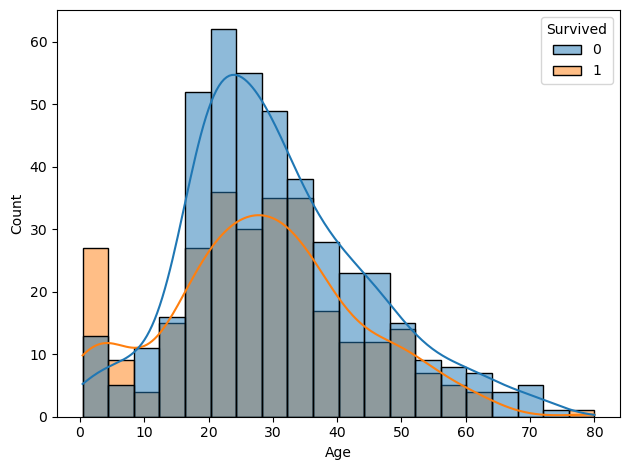

In [18]:
#Plot histogram of age for survived and did not survived class

sns.histplot(data=df,x="Age",kde=True,hue="Survived")
plt.tight_layout()
plt.show()


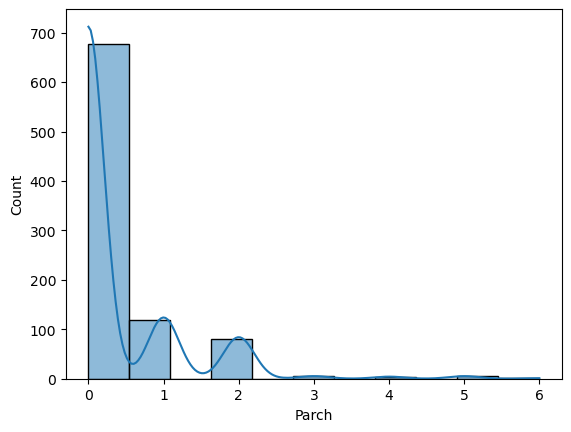

In [19]:
sns.histplot(data=df,x="Parch",kde=True)
plt.tight_layout
plt.show()

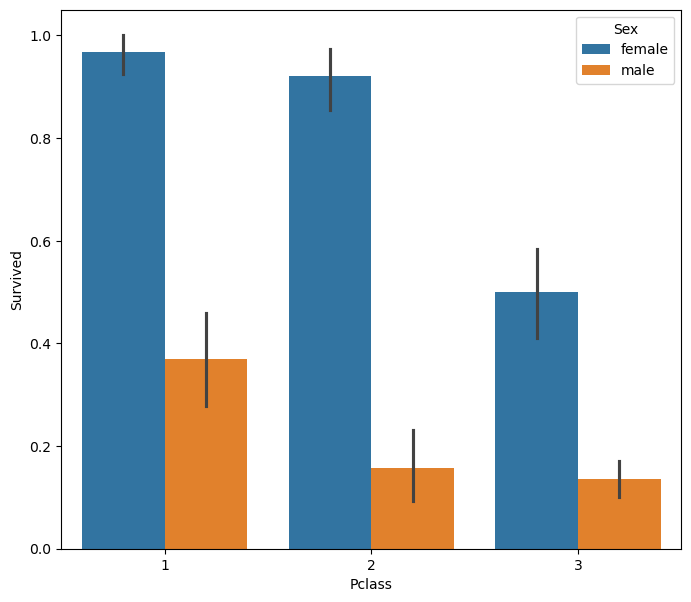

In [23]:
#Count class and gender wise survival rate - plot with appropriate chart
plt.figure(figsize=(8,7))
sns.barplot(data=df,x="Pclass",y="Survived",hue="Sex")
plt.show()
           

/tmp/ipykernel_4364/1449003071.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df,x="Age",hue="Sex",shade=True,common_norm=False)


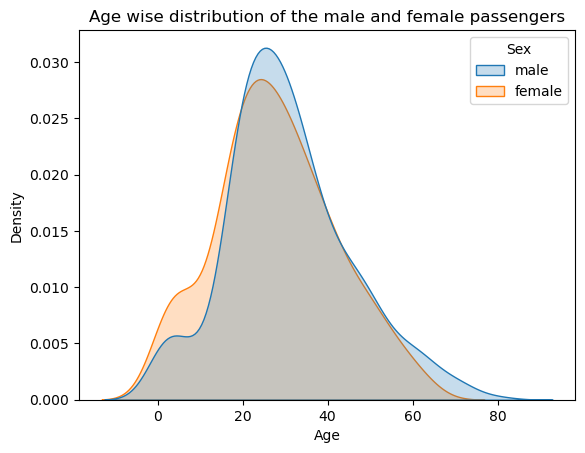

In [24]:
#Age wise Distribution of Male and Female passengers
# one way using: KDE plot

sns.kdeplot(data=df,x="Age",hue="Sex",shade=True,common_norm=False)
plt.title("Age wise distribution of the male and female passengers")
plt.show()
           

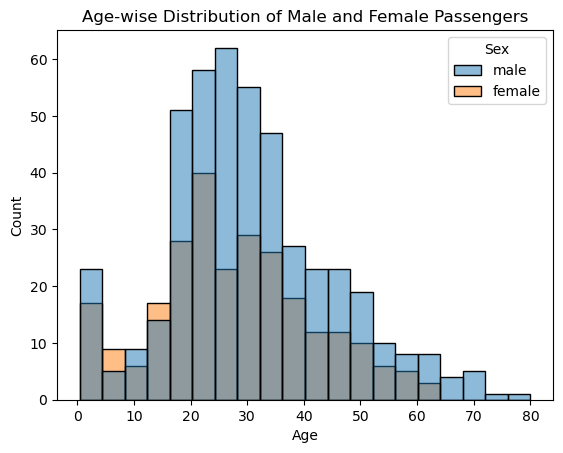

In [25]:
#Age wise Distribution of Male and Female passengers
# another way using : Histogram plot


sns.histplot(data=df,x="Age",hue="Sex")
plt.title("Age-wise Distribution of Male and Female Passengers")
plt.show()


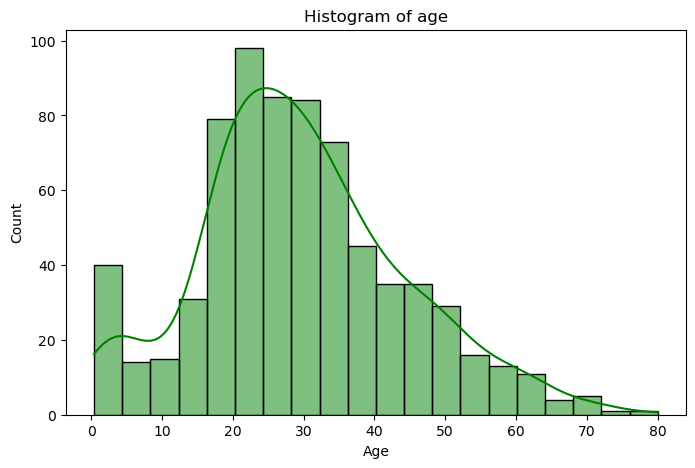

In [30]:
# Display the histogram of the age of the given data set
plt.figure(figsize=(8,5))
sns.histplot(data=df,x="Age",kde=True,color="green")
plt.title("Histogram of age")
plt.show()

In [ ]:
Handling missing values

In [31]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [33]:
# replace the missing values in Embarced column with "S"
df["Embarked"].fillna("S",inplace=True)
df.head()

/tmp/ipykernel_4364/3034865415.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna("S",inplace=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
#Impute the missing values in Fare column with median value
df["Fare"].fillna(df["Fare"].median(),inplace=True)

/tmp/ipykernel_4364/802544311.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Fare"].fillna(df["Fare"].median(),inplace=True)


In [35]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [36]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [37]:
#Impute the Age column. It has too many missing values but it may be important. 
#We fill the missing values with numbers randomly drawn from distribution
#that has same mean and standard deviation as non missing Age data

mean_age = df["Age"].mean()
std_age = df["Age"].std()

print(mean_age, std_age)

# x is the each value in Age col
def fill_missing(x):
    if pd.isnull(x):
        # at generates random numbers drawn from a normal (Gaussian) distribution 
        return np.random.normal(mean_age,std_age)
    return x

df["Age"] = df["Age"].apply(fill_missing)

mean_age = df["Age"].mean()
std_age = df["Age"].std()

print(mean_age, std_age)


29.69911764705882 14.526497332334044
29.613396103544385 14.519319937284026


In [ ]:
Feature Engineering-Creating new Features

In [39]:
# Create and add a new feature FamilySize as a combination of SibSp and Parch
#FamilySize = Parch + SibSp + 1

df["FamilySize"] = df["Parch"] + df["SibSp"] + 1

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [40]:
# Create new feature IsAlone from FamilySize
#If FamilySize == 1 then IsAlone = True else IsAlone = False

df["IsAlone"] = df["FamilySize"] == 1
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,True


In [ ]:
Create a new attribute Has_cabin using the attribue Cabin.

In [41]:
#if Cabin == NaN the Has_cabin = False else Has_cabin = True

df["Has_cabin"] = df["Cabin"].notna()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Has_cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,False,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,True,False


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  FamilySize   891 non-null    int64  
 13  IsAlone      891 non-null    bool   
 14  Has_cabin    891 non-null    bool   
dtypes: bool(2), float64(2), int64(6), object(5)
memory usage: 92.4+ KB


In [43]:
#Drop the columns which may not be useful in prediction of survival
#Drop PassengerId, Name, Ticket, and Cabin
df.drop(columns=["Name", "PassengerId","Ticket","Cabin"],inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Has_cabin
0,0,3,male,22.0,1,0,7.2500,S,2,False,False
1,1,1,female,38.0,1,0,71.2833,C,2,False,True
2,1,3,female,26.0,0,0,7.9250,S,1,True,False
3,1,1,female,35.0,1,0,53.1000,S,2,False,True
4,0,3,male,35.0,0,0,8.0500,S,1,True,False


In [ ]:
Model Building

In [44]:
#Prepare X and y

x = df.drop(columns="Survived")
y = df["Survived"]

x.head(), y.head()

(   Pclass     Sex   Age  SibSp  Parch     Fare Embarked  FamilySize  IsAlone  \
 0       3    male  22.0      1      0   7.2500        S           2    False   
 1       1  female  38.0      1      0  71.2833        C           2    False   
 2       3  female  26.0      0      0   7.9250        S           1     True   
 3       1  female  35.0      1      0  53.1000        S           2    False   
 4       3    male  35.0      0      0   8.0500        S           1     True   
 
    Has_cabin  
 0      False  
 1       True  
 2      False  
 3       True  
 4      False  ,
 0    0
 1    1
 2    1
 3    1
 4    0
 Name: Survived, dtype: int64)

In [45]:
df


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Has_cabin
0,0,3,male,22.000000,1,0,7.2500,S,2,False,False
1,1,1,female,38.000000,1,0,71.2833,C,2,False,True
2,1,3,female,26.000000,0,0,7.9250,S,1,True,False
3,1,1,female,35.000000,1,0,53.1000,S,2,False,True
4,0,3,male,35.000000,0,0,8.0500,S,1,True,False
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,1,True,False
887,1,1,female,19.000000,0,0,30.0000,S,1,True,True
888,0,3,female,47.244311,1,2,23.4500,S,4,False,False
889,1,1,male,26.000000,0,0,30.0000,C,1,True,True


In [47]:

# Label encoding of categorical features
from sklearn.preprocessing import LabelEncoder
cat_cols = df.select_dtypes(include="object").columns

for col in cat_cols:
    encoder = LabelEncoder()
    x[col] = encoder.fit_transform(x[col])

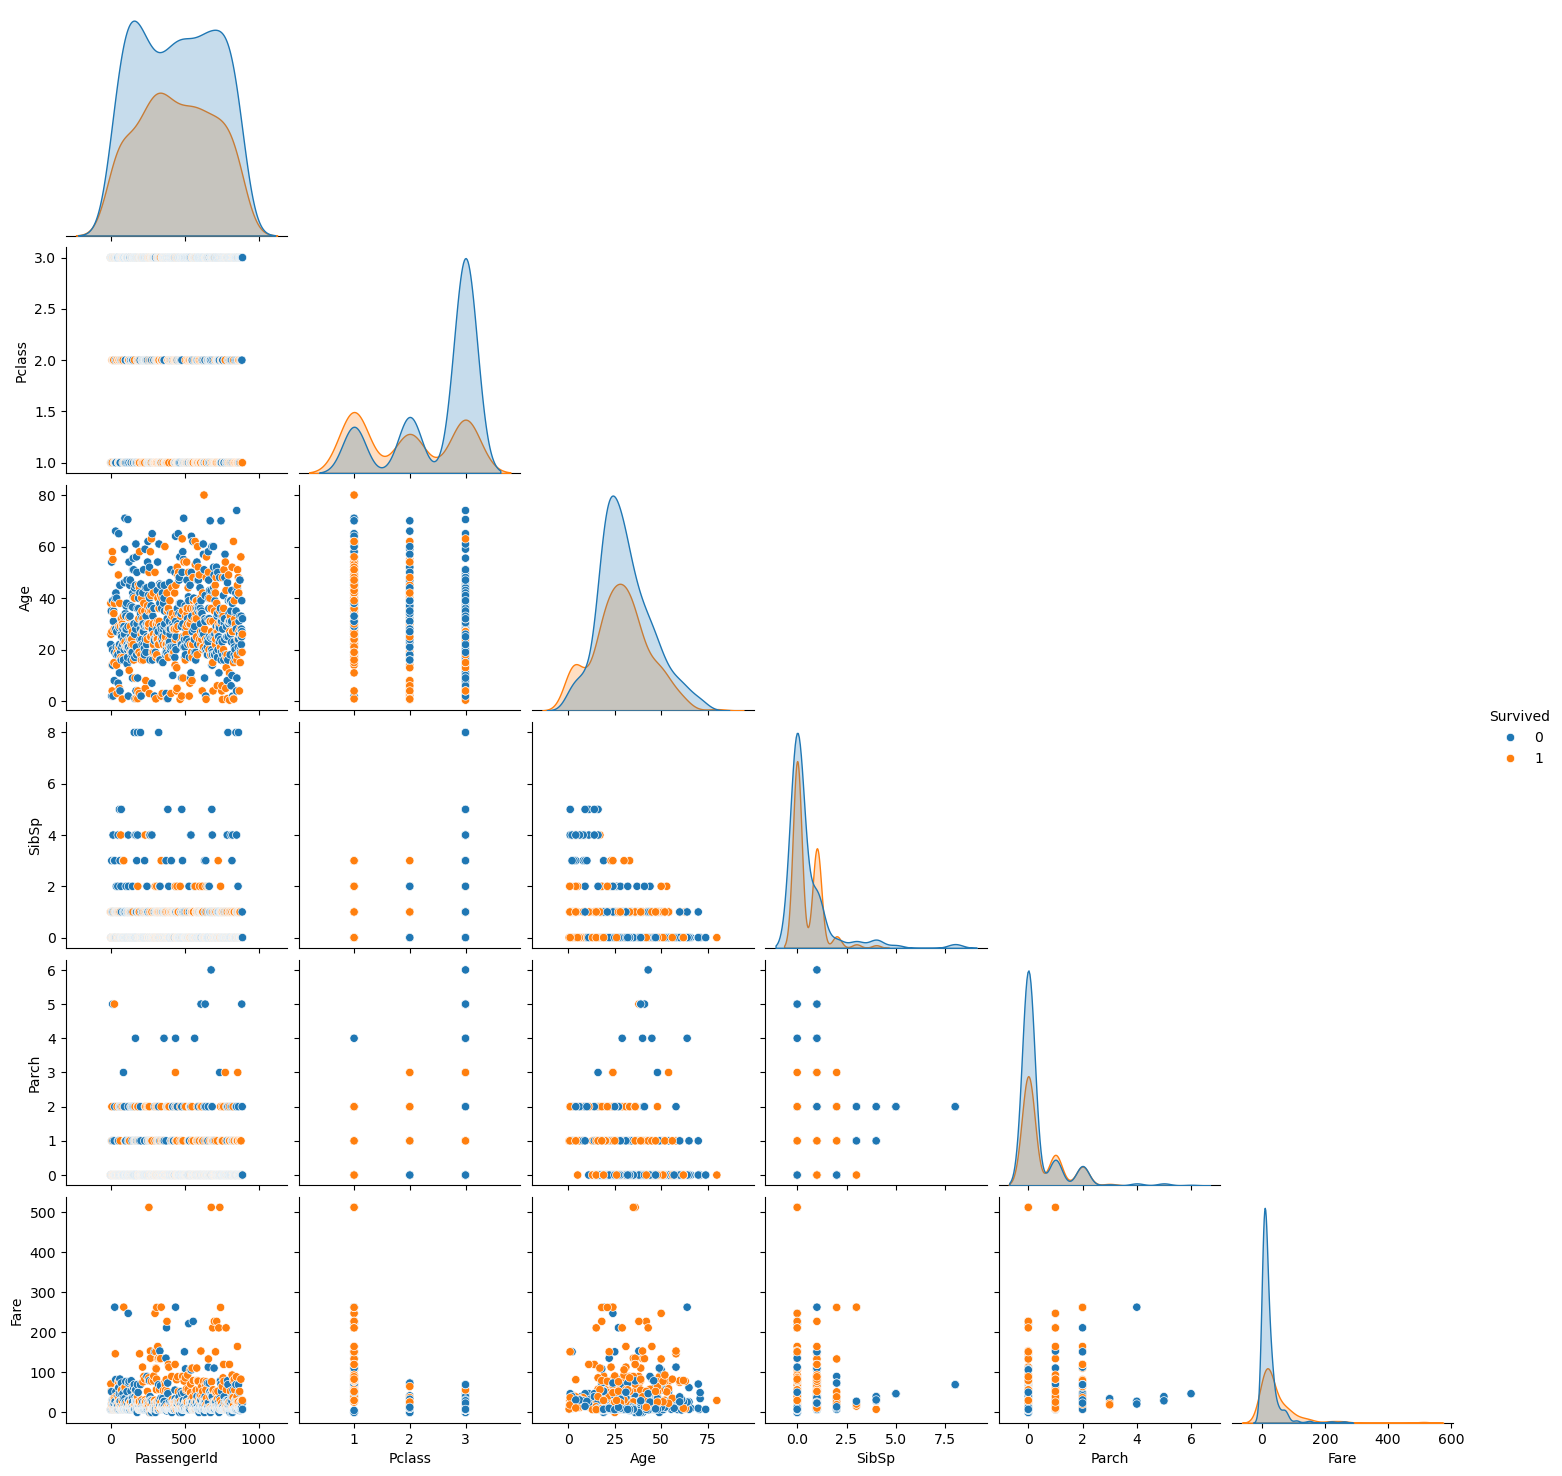

In [20]:
#Do a pairplot of all features
sns.pairplot(df,corner=True ,hue="Survived")
plt.show()

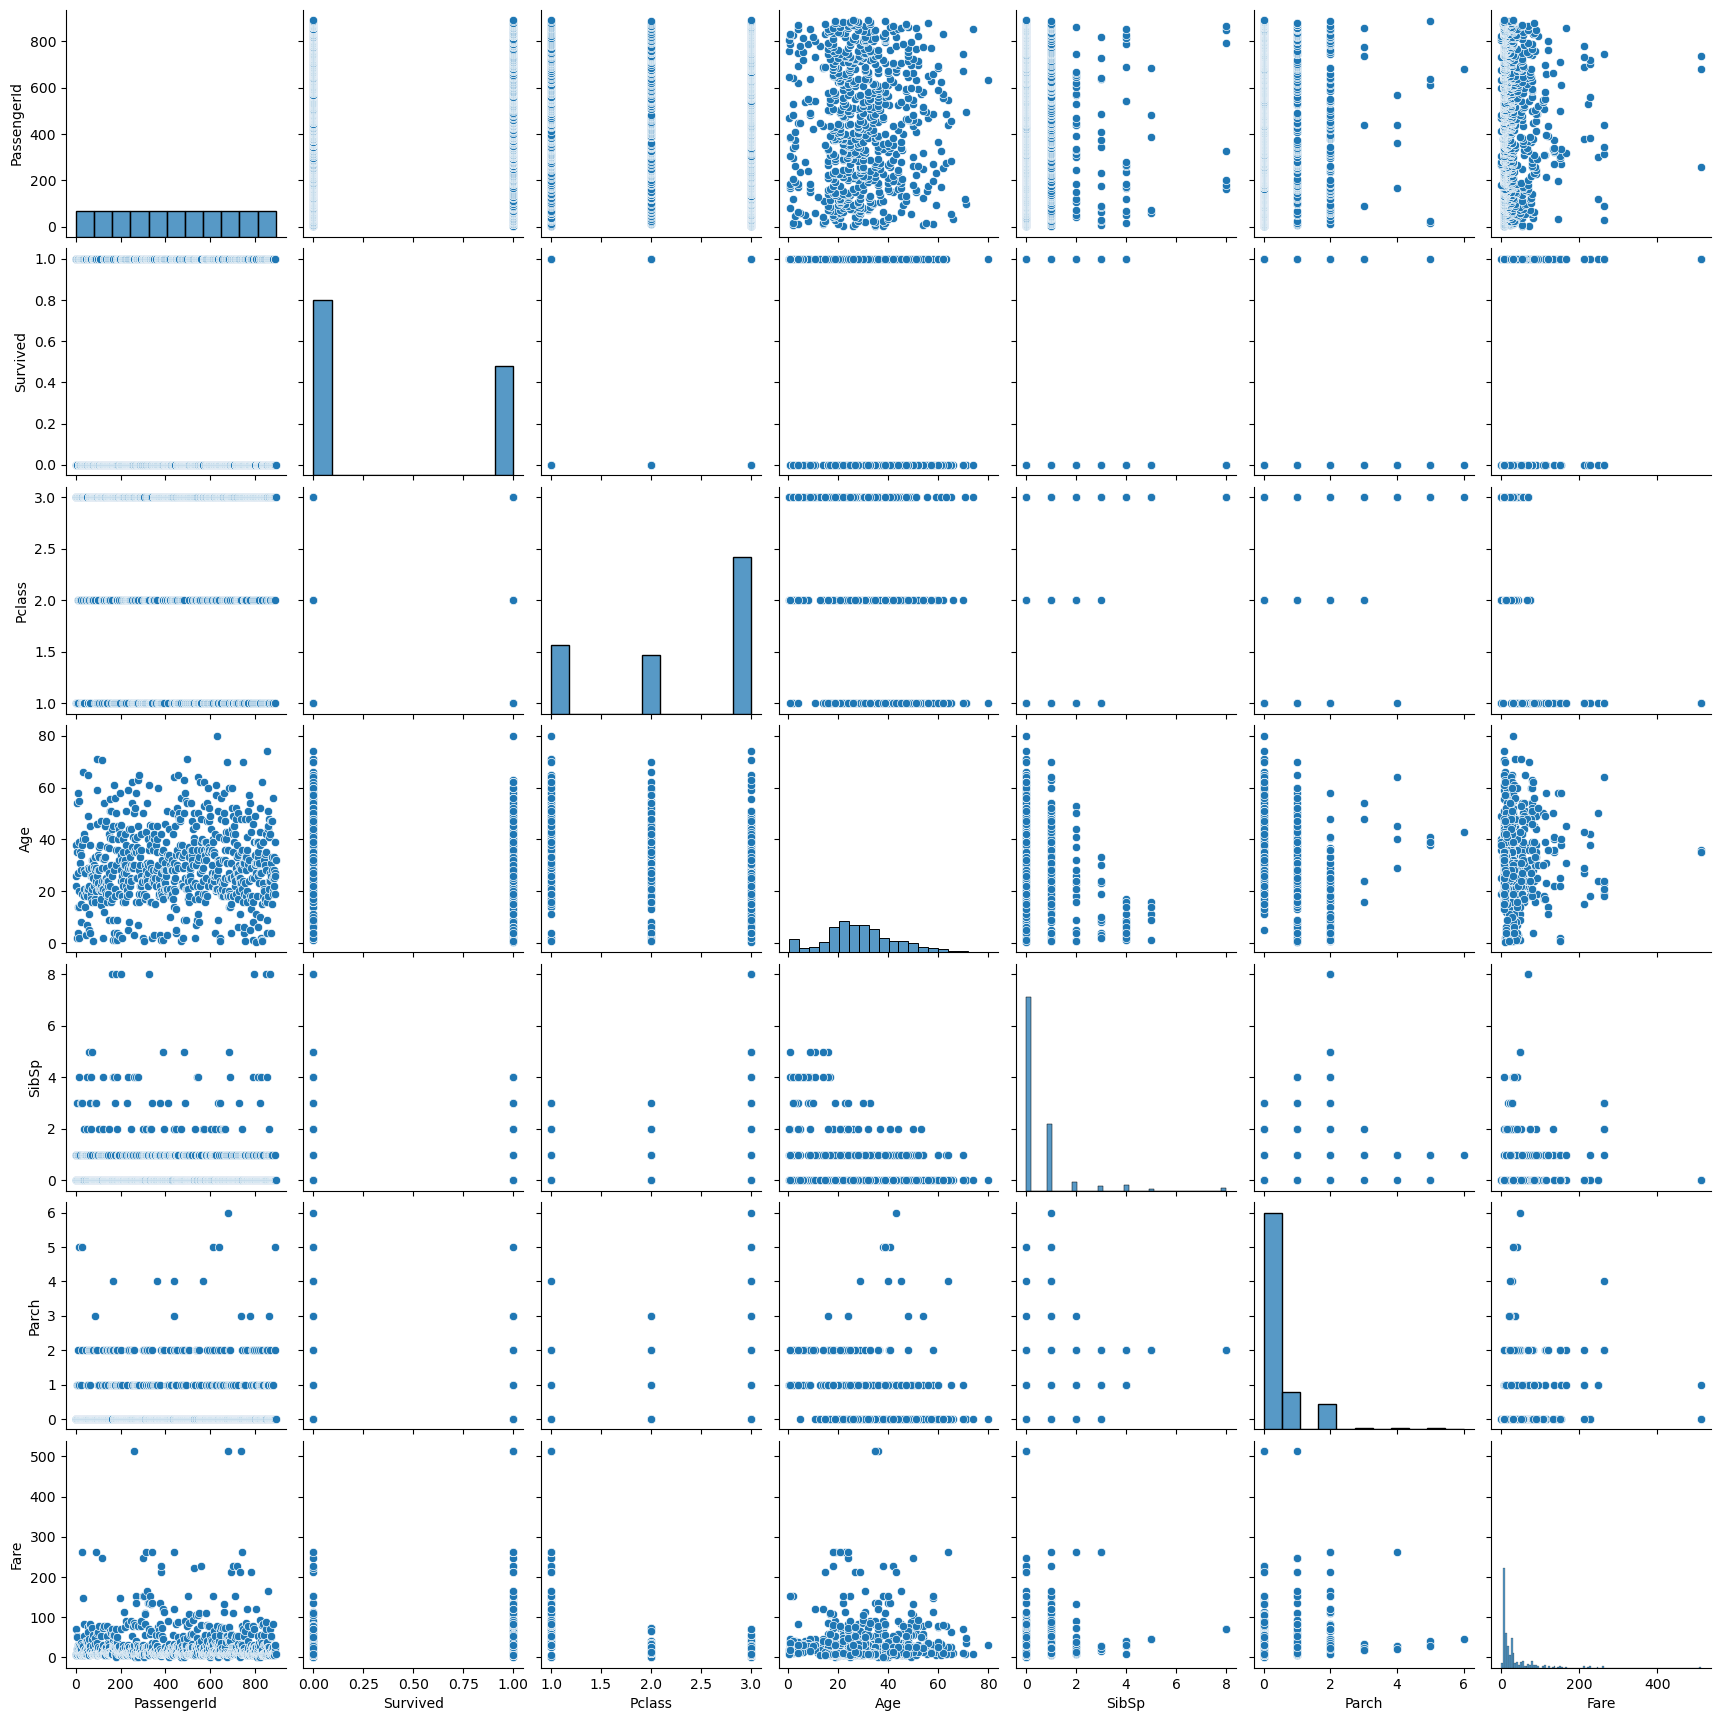

In [24]:
sns.pairplot(data=df)
plt.show()

In [52]:

# Splitting the data into train and validation set - 90% train 10% validation
#X_train, X_test, y_train, y_validation
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=42)

x_train.shape, x_test.shape

((801, 10), (90, 10))

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, precision_score, recall_score

In [54]:
# model building
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

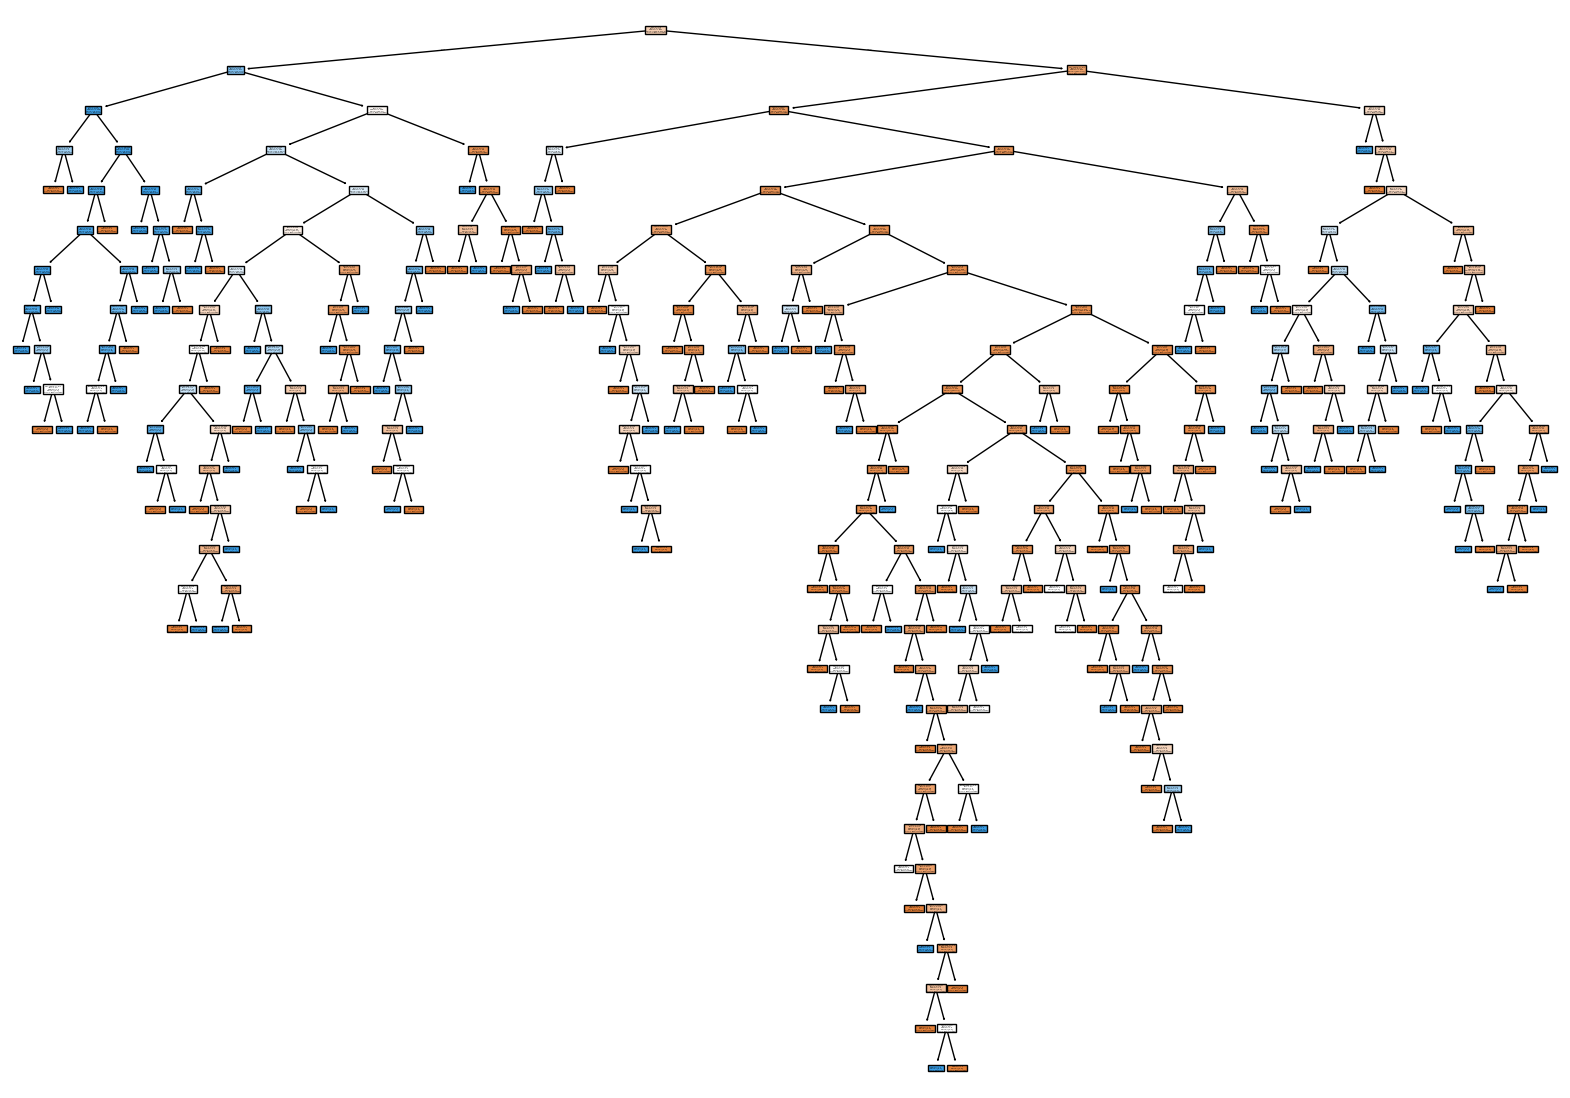

In [55]:
#Print the tree

# Importing required packages for visualization

plt.figure(figsize=(20,14))
plot_tree(model,feature_names=x.columns,class_names=["Not Survived","Survived"],filled=True)
plt.show()


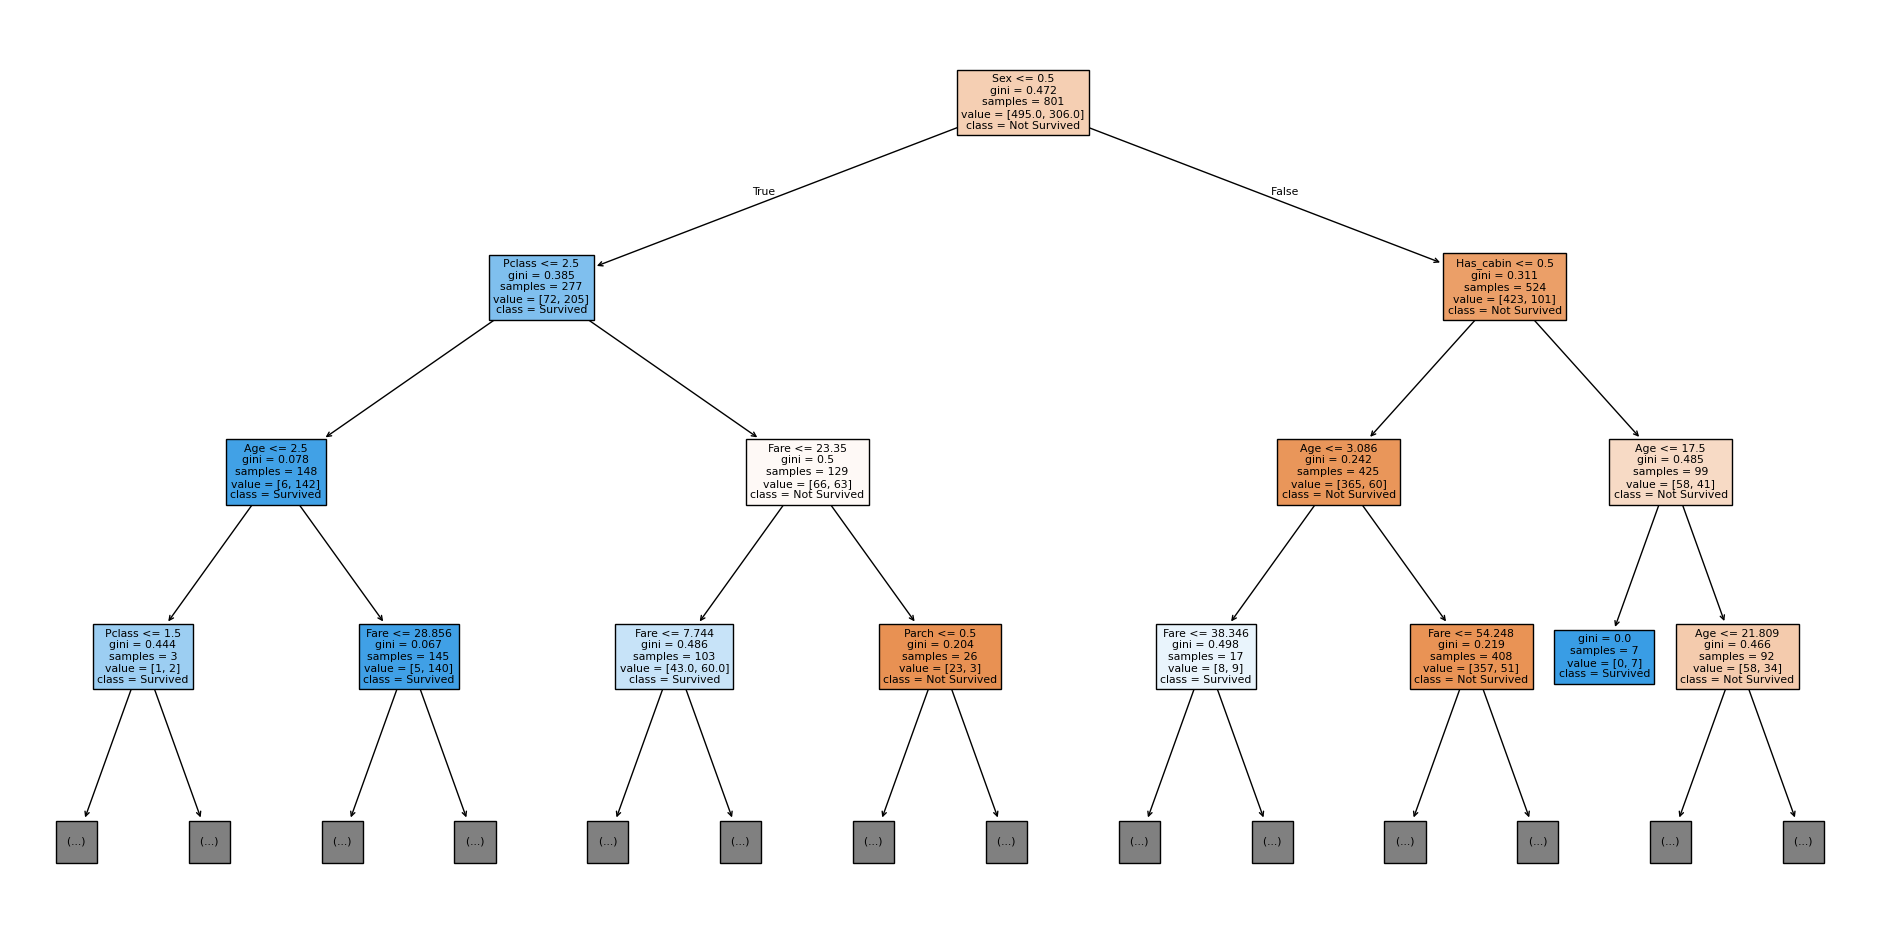

In [56]:
# plotting tree with max_depth=3

plt.figure(figsize=(24,12))
plot_tree(model,feature_names=x.columns,class_names=["Not Survived", "Survived"],filled=True,max_depth=3)
plt.show()

In [57]:
# Check the evaluation metrics of our default model on validation set - Confusion Matrix, Accuracy, Precision, Recall, F1 score

# Importing classification report and confusion matrix from sklearn metrics

# Making predictions

# Printing classification report

y_pred = model.predict(x_test)


print(f"Precision score : {precision_score(y_test,y_pred):.2f}")
print(f"Recall score: {recall_score(y_test,y_pred):.2f}")
print(f"F1 score :  {f1_score(y_test,y_pred):.2f}")
print("\nClassification Report : \n",classification_report(y_test,y_pred) )

Precision score : 0.68
Recall score: 0.83
F1 score :  0.75

Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.74      0.80        54
           1       0.68      0.83      0.75        36

    accuracy                           0.78        90
   macro avg       0.78      0.79      0.78        90
weighted avg       0.79      0.78      0.78        90



In [60]:
# Printing confusion matrix and accuracy
print("Cofusion matrix : \n",confusion_matrix(y_test,y_pred))
print(f"\nAccuracy score : {accuracy_score(y_test,y_pred):.2f}")


Cofusion matrix : 
 [[40 14]
 [ 6 30]]

Accuracy score : 0.78


In [61]:
print(confusion_matrix(y_test,y_pred))

[[40 14]
 [ 6 30]]


In [67]:
print(f"acc\n{accuracy_score(y_test,y_pred):.2f}")

acc
0.78
